In [2]:
#echo 1 | sudo tee /proc/sys/vm/overcommit_memory
#export LD_LIBRARY_PATH=${LD_LIBRARY_PATH}:/usr/local/cuda/lib64

import numpy as np

Path = "RBG32Bit"

#Load Training, validation and test images
train_images = np.load(Path + "/train_images.npy")
val_images = np.load(Path + "/val_images.npy")
test_images = np.load(Path + "/test_images.npy")

#Load Training, validation and test labels
train_lab = np.load(Path + "/train_lab.npy")
val_lab = np.load(Path + "/val_lab.npy")
test_lab = np.load(Path + "/test_lab.npy")



(52060, 64, 64, 3)
(52060, 10)
Epoch 1/100
1627/1627 [==============================] - ETA: 0s - loss: 1.7851 - acc: 0.3205
Epoch 00001: val_loss improved from inf to 1.65504, saving model to 3DCovBest.hdf5
1627/1627 [==============================] - 32s 20ms/step - loss: 1.7851 - acc: 0.3205 - val_loss: 1.6550 - val_acc: 0.3602
Epoch 2/100
1627/1627 [==============================] - ETA: 0s - loss: 1.6504 - acc: 0.3673
Epoch 00002: val_loss improved from 1.65504 to 1.62129, saving model to 3DCovBest.hdf5
1627/1627 [==============================] - 31s 19ms/step - loss: 1.6504 - acc: 0.3673 - val_loss: 1.6213 - val_acc: 0.3724
Epoch 3/100
1625/1627 [============================>.] - ETA: 0s - loss: 1.5882 - acc: 0.3955
Epoch 00003: val_loss improved from 1.62129 to 1.56011, saving model to 3DCovBest.hdf5
1627/1627 [==============================] - 32s 19ms/step - loss: 1.5880 - acc: 0.3956 - val_loss: 1.5601 - val_acc: 0.4204
Epoch 4/100
1626/1627 [============================>.] 

Epoch 30/100
1627/1627 [==============================] - ETA: 0s - loss: 1.0670 - acc: 0.7042
Epoch 00030: val_loss did not improve from 1.43281
1627/1627 [==============================] - 31s 19ms/step - loss: 1.0670 - acc: 0.7042 - val_loss: 1.5343 - val_acc: 0.5734
Epoch 31/100
1626/1627 [============================>.] - ETA: 0s - loss: 1.0642 - acc: 0.7099
Epoch 00031: val_loss did not improve from 1.43281
1627/1627 [==============================] - 31s 19ms/step - loss: 1.0642 - acc: 0.7099 - val_loss: 1.5594 - val_acc: 0.5788
Epoch 00031: early stopping
204/204 [==============================] - 1s 7ms/step - loss: 1.5698 - acc: 0.5664


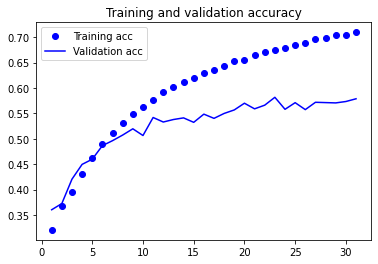

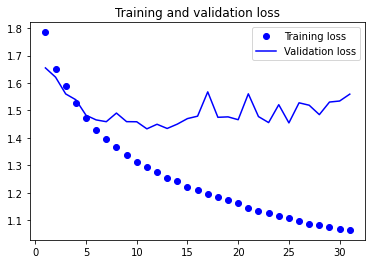

In [5]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image_dataset_from_directory
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import l2
#from keras.models import load_model
import os
import matplotlib.pyplot as plt

os.environ["TF_CPP_MIN_LOG_LEVEL"]="3" 

PixelDimension = 3

model = models.Sequential()
model.add(layers.SeparableConv2D(128, (3, 3), activation='relu', input_shape=(64, 64, PixelDimension)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.SeparableConv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.SeparableConv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(512, activation='relu', kernel_regularizer = l2(0.001)))
model.add(layers.Dense(10, activation='softmax', kernel_regularizer = l2(0.001)))

model.compile(loss='categorical_crossentropy', optimizer="rmsprop", metrics=['acc'])

#model.summary()


EarlyStop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
Checkpoint = ModelCheckpoint("3DCovBest.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min', period=1)

#model = models.load_model('F:\\training3000\\pngs_thicknesses_model_L2.h5')
#model.compile(loss='categorical_crossentropy', optimizer="rmsprop", metrics=['acc'])
print(train_images.shape)
print(train_lab.shape)



history = model.fit(train_images, train_lab, epochs=100, batch_size = 32, validation_data = (val_images, val_lab), shuffle = True, callbacks=[EarlyStop, Checkpoint])

model.save('3DCovLast.h5')

test_loss, test_acc = model.evaluate(test_images, test_lab)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()